<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Perform a service request data analysis of New York City 311 calls

*NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.*

**Happy coding!**

* * *

#### Problem Objective :

*Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service*

#### Analysis Tasks to be performed:

* (Perform a service request data analysis of New York City 311 calls) 

1. Import a 311 NYC service request.
2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
5. Perform a statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)
Are the type of complaint or service requested and location related? *

#### 1: Import the dataset

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 
from scipy import stats
from scipy.stats import chi2_contingency 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
pd.set_option('display.max_columns', None)
%matplotlib inline

#### 2: Loading the data

In [2]:
# read the dataset 
service = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

#### 3: View the first 5 and 5 last from data


In [3]:
# print the frist 5 

service.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
# print the last 5 .
service.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,CRESCENT AVENUE,EAST 186,NaN,east 186,NaN,NaN,NaN,NaN,NaN,Open,03/29/2015 08:33:41 AM,Your complaint has been forwarded to the New Y...,NaN,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,87 AVENUE,DEAD END,102 STREET,NaN,NaN,ADDRESS,RICHMOND HILL,NaN,Precinct,Closed,03/29/2015 08:33:28 AM,The Police Department responded and upon arriv...,03/29/2015 02:33:59 AM,09 QUEENS,QUEENS,1026931.0,192185.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,THROOP AVENUE,HOPKINS STREET,ELLERY STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,03/29/2015 08:33:03 AM,The Police Department responded to the complai...,03/29/2015 03:40:20 AM,03 BROOKLYN,BROOKLYN,999713.0,194161.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,EAST TREMONT AVENUE,CODDINGTON AVENUE,LA SALLE AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,03/29/2015 08:33:02 AM,The Police Department responded to the complai...,03/29/2015 04:38:35 AM,10 BRONX,BRONX,1030021.0,244520.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"
300697,30281825,03/29/2015 12:33:01 AM,03/29/2015 04:41:50 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,WEST 48 STREET,BROADWAY,8 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,03/29/2015 08:33:01 AM,The Police Department responded to the complai...,03/29/2015 04:41:50 AM,05 MANHATTAN,MANHATTAN,988150.0,216378.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"


#### 4: View size or shape the data


In [5]:
# the shape of data 
service.shape

(300698, 53)

#### 5: View the features or columns names


In [6]:
# print the name of columns 
service.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

#### 6: what is the data dtypes of dataset ?


In [7]:
# the types of dataset 
service.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

#### 7: discover the dataset by using info()

In [8]:
# print information data 
service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
Unique Key                        300698 non-null int64
Created Date                      300698 non-null object
Closed Date                       298534 non-null object
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type                      29

# 2: EDA

---

#### 1:Lets look at the description analysis of the data

In [9]:
# description analysis of the data
service.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


* from the description analysis there are a lot of null values or missing values *

#### 2:use unique() to see what are complaint types and  lengths 

In [10]:
# use unique() to see what are complaint types and what is the total copmlaint type  without repeated
service['Complaint Type'].unique()


array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [11]:
# what is the total copmlaint type  without repeated
len(service['Complaint Type'].unique())

24

#### 3:what are total number complaint for each complaint types 

In [12]:
#the count of each  Complaint Type in order  
service['Complaint Type'].value_counts().sort_values()

Animal in a Park                 1
Ferry Complaint                  2
Squeegee                         4
Agency Issues                    6
Graffiti                       113
Illegal Fireworks              168
Disorderly Youth               286
Panhandling                    307
Bike/Roller/Skate Chronic      427
Urinating in Public            592
Posting Advertisement          650
Noise - House of Worship       931
Drinking                      1280
Vending                       3802
Noise - Park                  4042
Homeless Encampment           4416
Traffic                       4498
Animal Abuse                  7778
Noise - Vehicle              17083
Derelict Vehicle             17718
Noise - Commercial           35577
Noise - Street/Sidewalk      48612
Illegal Parking              75361
Blocked Driveway             77044
Name: Complaint Type, dtype: int64

#### 4:what are total number complaint  for each city 

In [13]:
# the count number of  each city in order 
service['City'].value_counts().sort_values()

Howard Beach               1
East Elmhurst             14
BREEZY POINT              30
QUEENS                    32
CENTRAL PARK              97
NEW HYDE PARK             98
Woodside                 120
Long Island City         134
FLORAL PARK              152
ARVERNE                  220
GLEN OAKS                306
BELLEROSE                375
CAMBRIA HEIGHTS          477
OAKLAND GARDENS          551
LITTLE NECK              559
Astoria                  717
SUNNYSIDE                723
ROCKAWAY PARK            745
KEW GARDENS              771
SAINT ALBANS             834
SPRINGFIELD GARDENS      883
ROSEDALE                 922
HOWARD BEACH             931
HOLLIS                  1012
WHITESTONE              1098
FAR ROCKAWAY            1179
COLLEGE POINT           1220
BAYSIDE                 1221
REGO PARK               1486
FOREST HILLS            1688
JACKSON HEIGHTS         1689
MIDDLE VILLAGE          1765
QUEENS VILLAGE          1814
FRESH MEADOWS           1899
RICHMOND HILL 

In [14]:
# Read or convert the columns ‘Created Date’ and Closed Date’ 
# to datetime datatype and create a new column ‘Request_Closing_Time’ 
# as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)


* Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)*

#### 5:Read or convert the columns ‘Created Date’ and Closed Date’ 

In [15]:
# Read or convert the columns ‘Created Date’ and Closed Date’ 
service['Created Date'] = pd.to_datetime(service['Created Date'])
service['Closed Date'] = pd.to_datetime(service['Closed Date'])

#### 6: create a new column ‘Request_Closing_Time’ 

In [16]:
#  create a new column ‘Request_Closing_Time’ 
service["Request_Closing_Time"]=(service["Closed Date"]-service["Created Date"])

Request_Closing_Time=[]
for index in (service["Closed Date"]-service["Created Date"]):
    close=index.total_seconds()/60
    Request_Closing_Time.append(close)
    
service["Request_Closing_Time"]=Request_Closing_Time

In [17]:
service.Request_Closing_Time.value_counts().head().max()

492

In [18]:
service.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

# Data Visualization

---

Text(0, 0.5, 'Complaint Type')

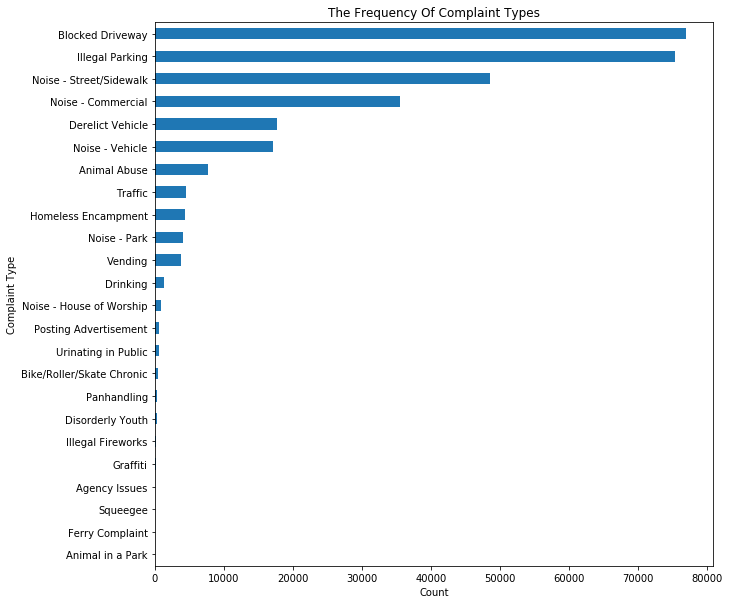

In [19]:
# lest plot the complains types
service['Complaint Type'].value_counts().sort_values().plot(kind ='barh',figsize = (10,10),title = 'The Frequency Of Complaint Types')
plt.xlabel('Count')
plt.ylabel('Complaint Type')

*the most common issues complaint types are blocked driveway, illegal parking, noise stress and noise commercial*

TYPICAL HISTOGRAM SHAPES AND WHAT THEY MEAN

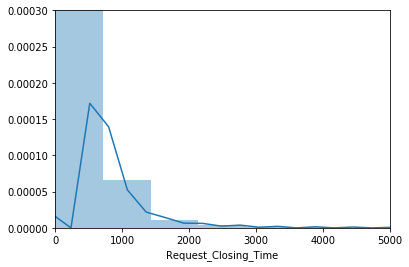

In [20]:
sns.distplot(service["Request_Closing_Time"].dropna())
plt.xlim((0,5000))
plt.ylim((0,0.0003))
plt.show()

Skewed Distribution
The skewed distribution is asymmetrical because a natural limit prevents outcomes on one side. The distribution’s peak is off center toward the limit and a tail stretches away from it. For example, a distribution of analyses of a very pure product would be skewed, because the product cannot be more than 100 percent pure. Other examples of natural limits are holes that cannot be smaller than the diameter of the drill bit or call-handling times that cannot be less than zero. These distributions are called right- or left-skewed according to the direction of the tail.



we can see that the data is right skewed.  Because the outliers and the requests are solved in less than 1000 hours.

In [21]:
service["Agency"].unique()

array(['NYPD'], dtype=object)

In [22]:
service['Location Type'].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge', 'Terminal', nan,
       'Ferry', 'Park'], dtype=object)

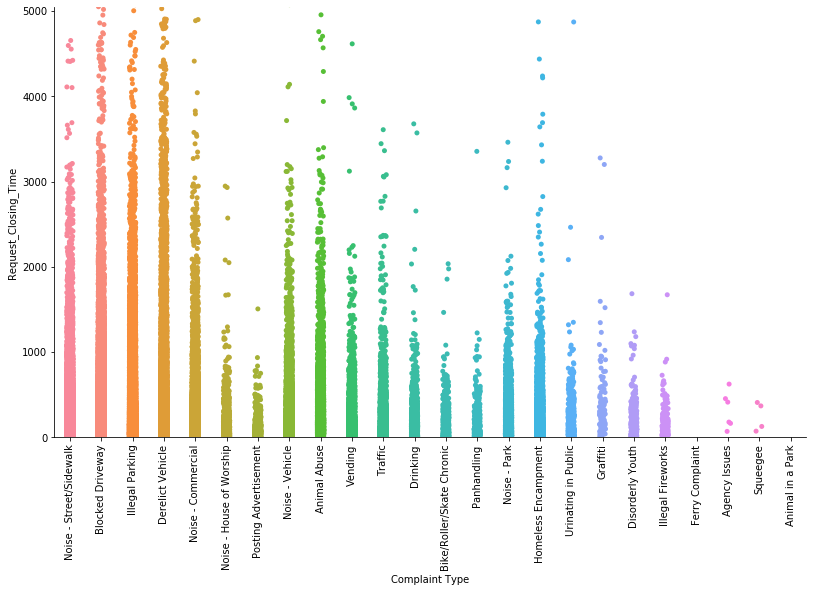

In [23]:
#Categorical Scatter Plot to understand which type of complaints are taking more time to get resolved
g=sns.catplot(x='Complaint Type', y="Request_Closing_Time",data=service)
g.fig.set_figwidth(15)
g.fig.set_figheight(7)
plt.xticks(rotation=90)
plt.ylim((0,5050))
plt.show()

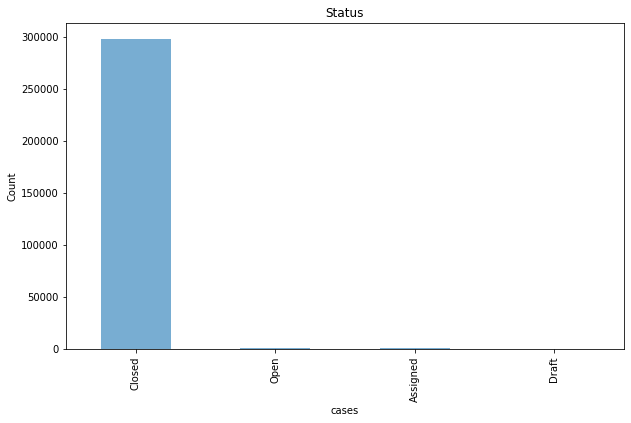

In [24]:
# Count plot to know the status of the requests
service['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(10,6))
plt.title('Status')
plt.xlabel('cases')
plt.ylabel('Count')
plt.show()


In [25]:
service['Request_Closing_Time'].describe()

count    298534.000000
mean        258.863880
std         365.369031
min           1.000000
25%          76.550000
50%         162.925000
75%         321.000000
max       35572.366667
Name: Request_Closing_Time, dtype: float64

In [26]:
# colucate the presentage of closed state
print(str((service['Status'].value_counts()[0]/len(service))*100) +' % of the cases are closed states')

99.25938981968619 % of the cases are closed states


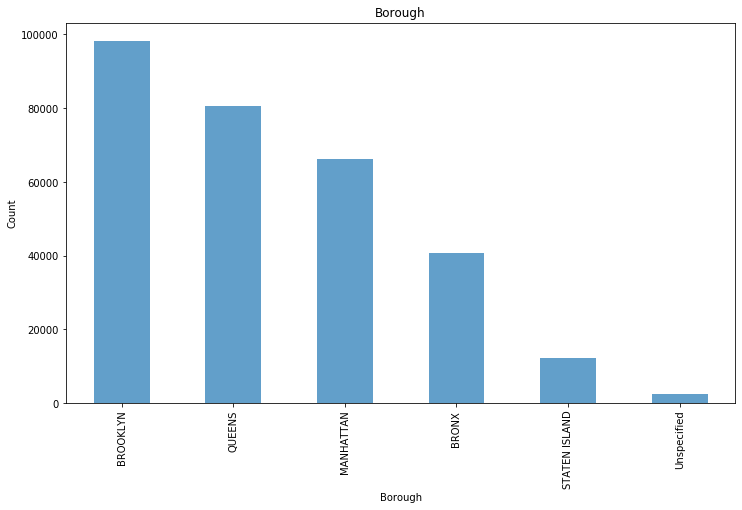

In [27]:
#Count Plot for Columns Borough
plt.figure(figsize=(12,7))
service['Borough'].value_counts().plot(kind='bar',alpha=0.7)
plt.title('Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()

#### 1: What is the Percentage of cases in each Borough?

In [28]:
 percentage_borough=[print("the Percentage from",i,"Borough is",round((service["Borough"]==i).sum()/len(service)*100,2),"%") for i in service["Borough"].unique()] 

the Percentage from MANHATTAN Borough is 21.99 %
the Percentage from QUEENS Borough is 26.82 %
the Percentage from BRONX Borough is 13.54 %
the Percentage from BROOKLYN Borough is 32.69 %
the Percentage from Unspecified Borough is 0.86 %
the Percentage from STATEN ISLAND Borough is 4.1 %


In [29]:
service["Request_Closing_Time"].mean()

258.86387971442474

In [30]:
service[['Location Type']]

,Location Type
0,Street/Sidewalk
1,Street/Sidewalk
2,Street/Sidewalk
3,Street/Sidewalk
4,Street/Sidewalk
...,...
300693,Club/Bar/Restaurant
300694,Street/Sidewalk
300695,Club/Bar/Restaurant
300696,Club/Bar/Restaurant


#### 2: Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

In [31]:
#Request Closing Time for all City sorted in ascending Order
request_colsein_mean_time=pd.DataFrame(service.groupby("City")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time").reset_index()
request_colsein_mean_time

,City,Request_Closing_Time
0,ARVERNE,135.895606
1,ROCKAWAY PARK,139.133736
2,LITTLE NECK,154.660316
3,OAKLAND GARDENS,157.853146
4,BAYSIDE,160.759992
5,FAR ROCKAWAY,167.399774
6,NEW YORK,178.357371
7,FLUSHING,181.081826
8,FOREST HILLS,193.449032
9,CORONA,193.670512


In [32]:
request_colsein_mean_time.max()

City                    Woodside
Request_Closing_Time     815.586
dtype: object

In [33]:
request_colsein_mean_time.min()

City                    ARVERNE
Request_Closing_Time    135.896
dtype: object

#### 3:Histogram plot (Request_Mean_Closing_Time)

Text(0.5, 1.0, 'Request_Mean_Closing_Time')

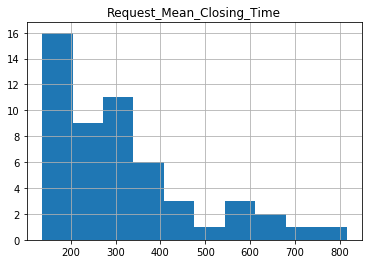

In [34]:
request_colsein_mean_time.hist(column='Request_Closing_Time')
plt.title('Request_Mean_Closing_Time')

#### 4: ploting Request_Mean_Closing_Time with city

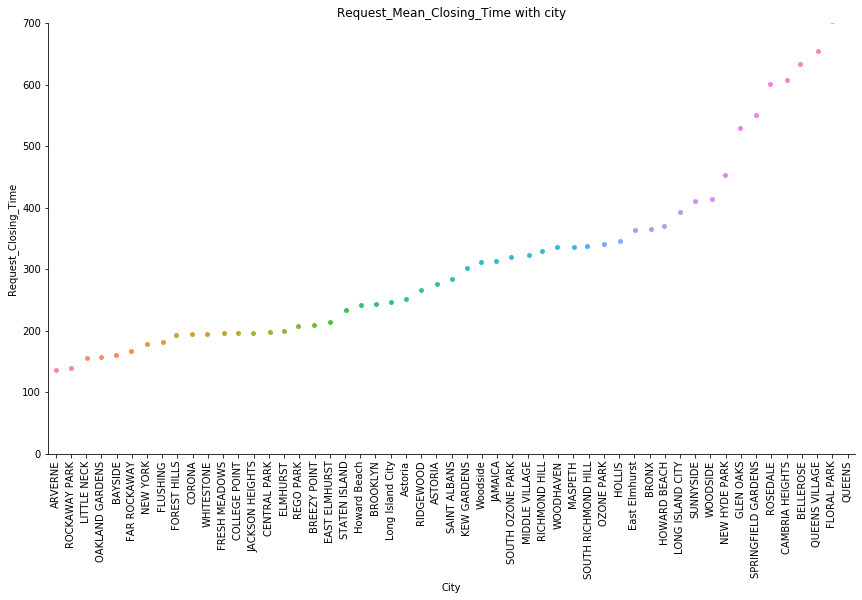

In [35]:
g=sns.catplot(x='City', y="Request_Closing_Time",data=request_colsein_mean_time)
g.fig.set_figwidth(15)
g.fig.set_figheight(7)
plt.title('Request_Mean_Closing_Time with city')

plt.xticks(rotation=90)
plt.ylim((0,700))
plt.show()

#### 5 :Drop unnecessary columns that are null values

In [36]:
# what 100% contain nulls values 
service.isnull().sum()==(len(service))

Unique Key                        False
Created Date                      False
Closed Date                       False
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                        False
Location Type                     False
Incident Zip                      False
Incident Address                  False
Street Name                       False
Cross Street 1                    False
Cross Street 2                    False
Intersection Street 1             False
Intersection Street 2             False
Address Type                      False
City                              False
Landmark                          False
Facility Type                     False
Status                            False
Due Date                          False
Resolution Description            False
Resolution Action Updated Date    False
Community Board                   False
Borough                           False


In [37]:
det=[]
for x in service.columns.tolist():
    if service[x].nunique()<=3:
        print(x+ " "*10+" : ",service[x].unique())
        det.append(x)

Agency           :  ['NYPD']
Agency Name           :  ['New York City Police Department' 'NYPD' 'Internal Affairs Bureau']
Facility Type           :  ['Precinct' nan]
Park Facility Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Number           :  ['Unspecified' 'Q001']
School Region           :  ['Unspecified' nan]
School Code           :  ['Unspecified' nan]
School Phone Number           :  ['Unspecified' '7182176034']
School Address           :  ['Unspecified' 'Grand Central Parkway, near the soccer field']
School City           :  ['Unspecified' 'QUEENS']
School State           :  ['Unspecified' 'NY']
School Zip           :  ['Unspecified' nan]
School Not Found           :  ['N']
School or Citywide Complaint           :  [nan]
Vehicle Type           :  [nan]
Taxi Company Borough           :  [nan]
Taxi Pick Up Location           :  [nan]
Road Ramp           :  [nan 'Roadway' 'Ramp

In [38]:
service.drop(det,axis=1,inplace=True)

In [39]:
service.shape

(300698, 32)

In [40]:
columns_unnecessary =["Unique Key","Incident Address","Descriptor","Street Name","Cross Street 1","Cross Street 2","Due Date","Resolution Description","Resolution Action Updated Date","Community Board","X Coordinate (State Plane)","Y Coordinate (State Plane)","Park Borough","Latitude","Longitude","Location"]
service.drop(columns_unnecessary,axis=1,inplace=True)

In [41]:
service

,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Status,Borough,Bridge Highway Name,Bridge Highway Direction,Bridge Highway Segment,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Street/Sidewalk,10034.0,NaN,NaN,ADDRESS,NEW YORK,NaN,Closed,MANHATTAN,NaN,NaN,NaN,55.250000
1,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,Street/Sidewalk,11105.0,NaN,NaN,ADDRESS,ASTORIA,NaN,Closed,QUEENS,NaN,NaN,NaN,86.266667
2,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,Street/Sidewalk,10458.0,NaN,NaN,ADDRESS,BRONX,NaN,Closed,BRONX,NaN,NaN,NaN,291.516667
3,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Street/Sidewalk,10461.0,NaN,NaN,ADDRESS,BRONX,NaN,Closed,BRONX,NaN,NaN,NaN,465.233333
4,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Street/Sidewalk,11373.0,NaN,NaN,ADDRESS,ELMHURST,NaN,Closed,QUEENS,NaN,NaN,NaN,207.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,2015-03-29 00:33:41,NaT,Noise - Commercial,Club/Bar/Restaurant,NaN,east 186,NaN,NaN,NaN,NaN,Open,Unspecified,NaN,NaN,NaN,NaN
300694,2015-03-29 00:33:28,2015-03-29 02:33:59,Blocked Driveway,Street/Sidewalk,11418.0,NaN,NaN,ADDRESS,RICHMOND HILL,NaN,Closed,QUEENS,NaN,NaN,NaN,120.516667
300695,2015-03-29 00:33:03,2015-03-29 03:40:20,Noise - Commercial,Club/Bar/Restaurant,11206.0,NaN,NaN,ADDRESS,BROOKLYN,NaN,Closed,BROOKLYN,NaN,NaN,NaN,187.283333
300696,2015-03-29 00:33:02,2015-03-29 04:38:35,Noise - Commercial,Club/Bar/Restaurant,10461.0,NaN,NaN,ADDRESS,BRONX,NaN,Closed,BRONX,NaN,NaN,NaN,245.550000


In [42]:
# service['School or Citywide Complaint'].unique()

In [43]:
service.isnull().sum()

Created Date                     0
Closed Date                   2164
Complaint Type                   0
Location Type                  131
Incident Zip                  2615
Intersection Street 1       256840
Intersection Street 2       257336
Address Type                  2815
City                          2614
Landmark                    300349
Status                           0
Borough                          0
Bridge Highway Name         300455
Bridge Highway Direction    300455
Bridge Highway Segment      300485
Request_Closing_Time          2164
dtype: int64

In [44]:
# covnvert datatime create date and close date
columns_unnecessary2=["Bridge Highway Name","Bridge Highway Direction","Bridge Highway Segment","Intersection Street 1","Intersection Street 2","Landmark"]

In [45]:
service.drop(columns_unnecessary2,axis=1,inplace=True)

In [46]:
service.shape

(300698, 10)

In [47]:
# EDA part 

In [48]:
service.isnull().sum()

Created Date               0
Closed Date             2164
Complaint Type             0
Location Type            131
Incident Zip            2615
Address Type            2815
City                    2614
Status                     0
Borough                    0
Request_Closing_Time    2164
dtype: int64

In [49]:
service.dropna(inplace=True)

In [50]:
service.shape

(297666, 10)

In [51]:
service.isnull().sum()

Created Date            0
Closed Date             0
Complaint Type          0
Location Type           0
Incident Zip            0
Address Type            0
City                    0
Status                  0
Borough                 0
Request_Closing_Time    0
dtype: int64

(0, 2100)

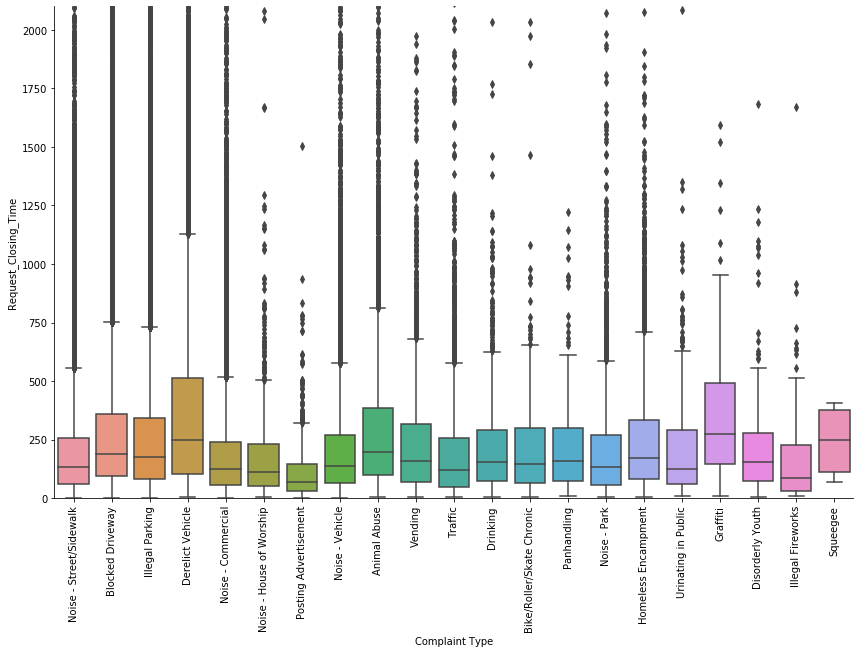

In [52]:
g=sns.catplot(x="Complaint Type",y="Request_Closing_Time",kind="box",data=service)
g.fig.set_figheight(8)
g.fig.set_figwidth(15)
plt.xticks(rotation=90)
plt.ylim((0,2100))

#### 6:Hypothesis Testing

provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall) Are the type of complaint or service requested and location related? 

Hypothesis Testing sample one 
- H0: there is no significant different in average of Request_Closing_Time for different complaint types 
- H1 : there is significant different in average of Request_Closing_Time for different complaint types 

In [53]:
from scipy import stats
from scipy.stats import chi2_contingency 

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [54]:
df_test_1 =pd.DataFrame()
df_test_1["Request_Closing_Time"]=service["Request_Closing_Time"]
df_test_1["Complaint"]=service["Complaint Type"]
df_test_1.head()

,Request_Closing_Time,Complaint
0,55.250000,Noise - Street/Sidewalk
1,86.266667,Blocked Driveway
2,291.516667,Blocked Driveway
3,465.233333,Illegal Parking
4,207.033333,Illegal Parking


In [55]:
lr = ols("Request_Closing_Time~Complaint",data=df_test_1).fit()
table=sm.stats.anova_lm(lr)
table

,df,sum_sq,mean_sq,F,PR(>F)
Complaint,20.0,1.050465e+09,5.252325e+07,409.61991,0.0
Residual,297645.0,3.816534e+10,1.282243e+05,NaN,NaN


Since p value for the Complaint is less 0.0 thus we reject the null hypothesis i.e meanwhile fail to reject alternate hypothes .there is significant difference in the mean response time different type of complaint.

Hypothesis Testing sample two 
- H0:Complaint Type and Location Type are not related
- H1:Complaint Type and Location Type are related

In [56]:
chisq=pd.DataFrame()
chisq["Location Type"]=service["Location Type"]
chisq["Complaint Type"]=service["Complaint Type"]

In [57]:
crosstab = pd.crosstab( chisq["Location Type"],chisq["Complaint Type"])

In [58]:
g, p, dof, expctd = chi2_contingency(crosstab, lambda_="log-likelihood")

In [59]:
alpha = 0.05
if p <= alpha: 
    print(' related') 
    print('reject H0')
else: 
    print('not related')
    print('fail to reject H0')

 related
reject H0


### Conclusions

- Maximum Complaints get increased in block driveway and parking related location  
- the average takes complains closed are 258 hours
- Number of cases from Borough goes as following BROOKLYN , QUEENS , MANHATTAN , BRONX , STATEN ISLAND
- Complaint Type are Depentent on Location Type.
- Time taken for solving different complaint type are different
- The Maximum based on the average ‘Request Closing Time’ are 815 hours on Woodside
- Transport and Road related issues are taking more time to get resolved meanwhile  high number of complaints.
